In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt

import jax.numpy as jnp
import jax.random as jr
from cohlib.utils import pickle_save, pickle_open

In [3]:
from cohlib.utils import gamma_root
from cohlib.jax.dists import sample_from_gamma
from cohlib.jax.observations import add0
from cohlib.jax.gamma_create import k2_flat
flow = 1
fhigh = 50
scale_power = 3

In [4]:

k2_flat(flow, fhigh, scale_power)
gamma_name = f'k2-flat{flow}-{fhigh}-{scale_power}'
gamma_path = os.path.join(gamma_root(), f"{gamma_name}.pickle")
gamma_load = pickle_open(gamma_path)
gamma_full = gamma_load['gamma']
freqs = gamma_load['freqs']
nz = gamma_load['nonzero_inds']
# tind = gamma_load['target_ind']
# scale_nonzero = 500
# gamma_full *= scale_nonzero


In [5]:
gamma_load['target_inds']

Array([], shape=(0,), dtype=int32)

In [6]:
gamma_full[nz,:,:]

Array([[[1000.+0.j,    0.+0.j],
        [   0.+0.j, 1000.+0.j]],

       [[1000.+0.j,    0.+0.j],
        [   0.+0.j, 1000.+0.j]],

       [[1000.+0.j,    0.+0.j],
        [   0.+0.j, 1000.+0.j]],

       [[1000.+0.j,    0.+0.j],
        [   0.+0.j, 1000.+0.j]],

       [[1000.+0.j,    0.+0.j],
        [   0.+0.j, 1000.+0.j]],

       [[1000.+0.j,    0.+0.j],
        [   0.+0.j, 1000.+0.j]],

       [[1000.+0.j,    0.+0.j],
        [   0.+0.j, 1000.+0.j]],

       [[1000.+0.j,    0.+0.j],
        [   0.+0.j, 1000.+0.j]],

       [[1000.+0.j,    0.+0.j],
        [   0.+0.j, 1000.+0.j]],

       [[1000.+0.j,    0.+0.j],
        [   0.+0.j, 1000.+0.j]],

       [[1000.+0.j,    0.+0.j],
        [   0.+0.j, 1000.+0.j]],

       [[1000.+0.j,    0.+0.j],
        [   0.+0.j, 1000.+0.j]],

       [[1000.+0.j,    0.+0.j],
        [   0.+0.j, 1000.+0.j]],

       [[1000.+0.j,    0.+0.j],
        [   0.+0.j, 1000.+0.j]],

       [[1000.+0.j,    0.+0.j],
        [   0.+0.j, 1000.+0.j]],

       [[1

In [7]:

rk = jr.key(7)
L = 25
zs = sample_from_gamma(rk, gamma_full, L)

zs_0dc = jnp.apply_along_axis(add0, 0, zs)
xs = jnp.fft.irfft(zs_0dc, axis=0)


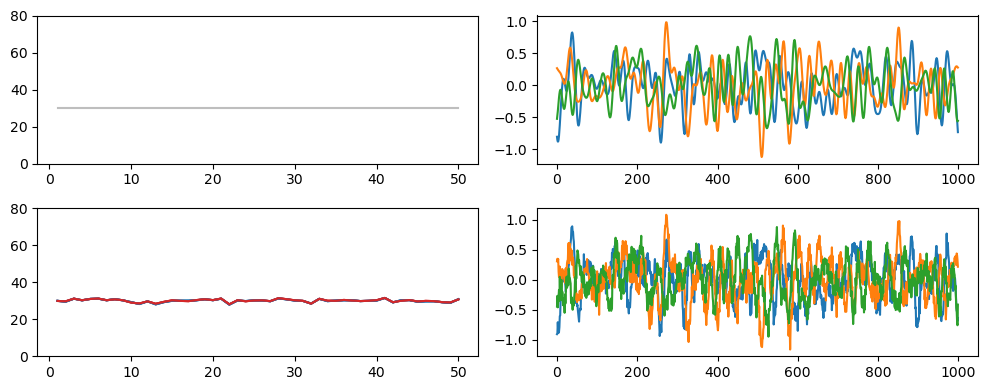

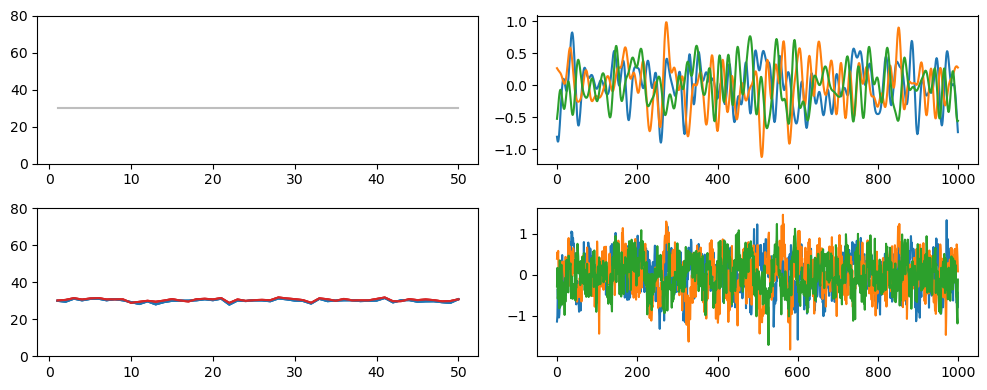

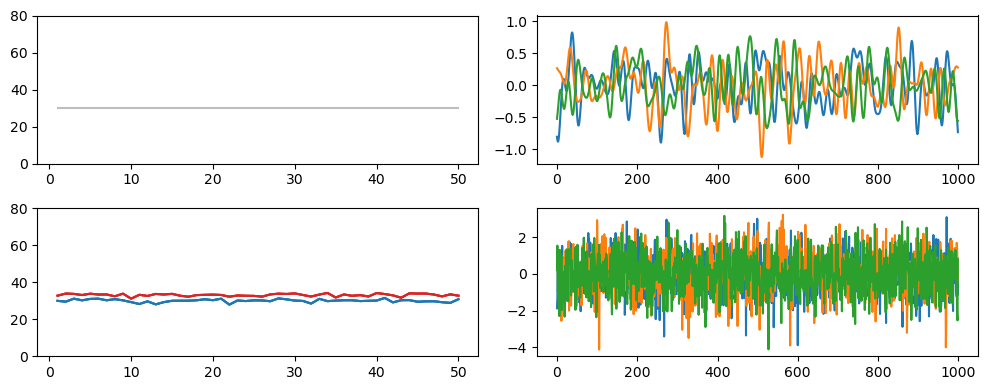

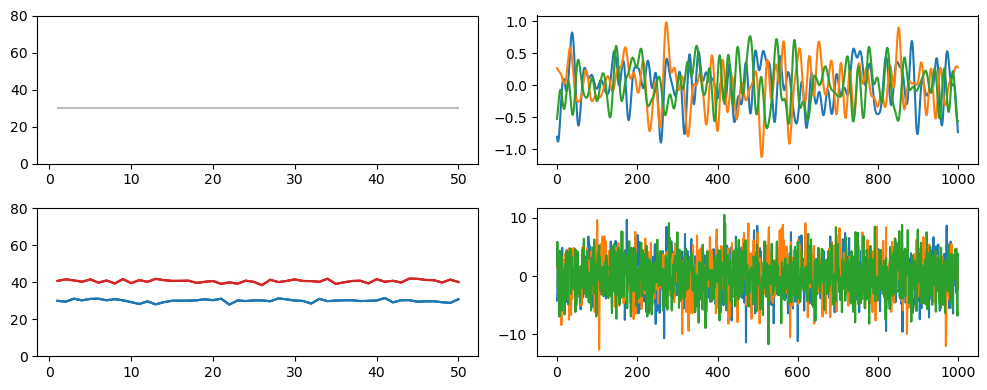

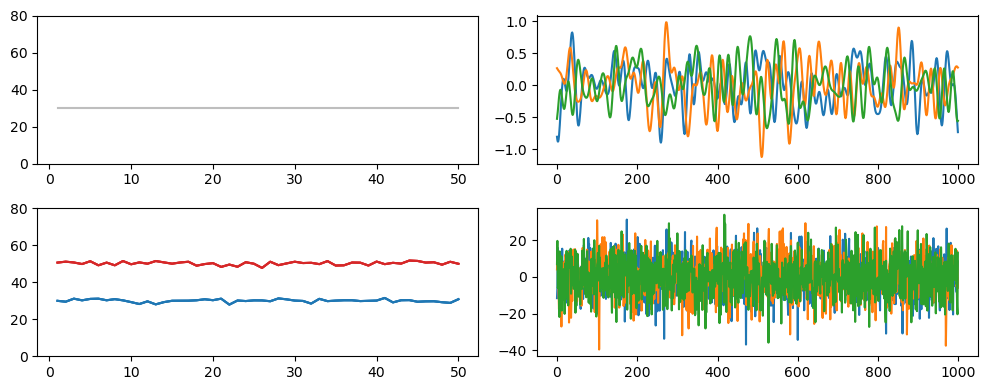

In [9]:
for o2 in [-2, -1, 0, 1, 2]:
    o1 = 1
    # o2 = 2 
    obs_var = o1 * 10**o2
    obs = xs + jr.normal(rk, xs.shape)*jnp.sqrt(obs_var)

    oracle_est = jnp.einsum('jkl,jil->jkil', zs, zs.conj()).mean(-1)
    obs_f = jnp.fft.rfft(obs, axis=0)
    zs_naive = obs_f[1:,:,:]
    naive_est = jnp.einsum('jkl,jil->jkil', zs_naive, zs_naive.conj()).mean(-1)

    dB = True
    fig, ax = plt.subplots(2,2,figsize=(10,4))
    S_true = gamma_full[nz,0,0].real
    S_oracle = oracle_est[nz,0,0].real
    S_naive = naive_est[nz,0,0].real
    # ax[1,0].plot(S_true, color='tab:grey', alpha=0.5)

    if dB is True:
        S_true = 10*jnp.log10(S_true+1e-15)
        S_oracle = 10*jnp.log10(S_oracle+1e-15)
        S_naive = 10*jnp.log10(S_naive+1e-15)

    ax[0,0].plot(freqs[nz], S_true, color='tab:grey', alpha=0.5)
    for l in range(3):
        ax[1,0].plot(freqs[nz], S_oracle, color='tab:blue')
        ax[1,0].plot(freqs[nz], S_naive, color='tab:red')
        ax[0,1].plot(xs[:,0,l])
        ax[1,1].plot(obs[:,0,l])
        ax[0,0].set_ylim([0,80])
        ax[1,0].set_ylim([0,80])
    plt.tight_layout()

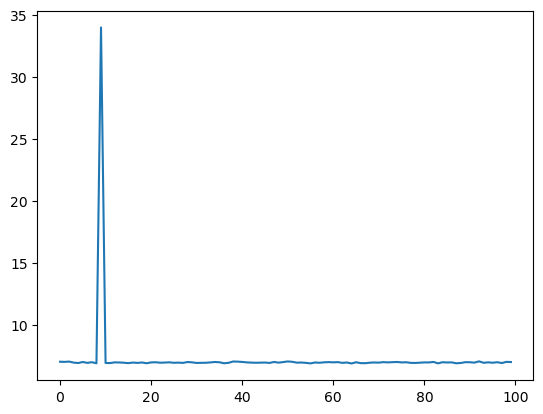

In [65]:
# plt.plot(gamma_full[nz,0,0].real)
plt.plot(10*jnp.log10(gamma_full[nz,0,0].real))

In [48]:
# K = gamma_full.shape[-1]
# Nnz = nz.size
# diag_mask = jnp.stack([jnp.eye(K) for n in range(Nnz)])
# gamma_nonzero = jnp.stack([jnp.eye(K, dtype=complex) for _ in range(Nnz)])
# gamma_nonzero + jr.normal(rk, gamma_nonzero.shape)*diag_mask*0.1

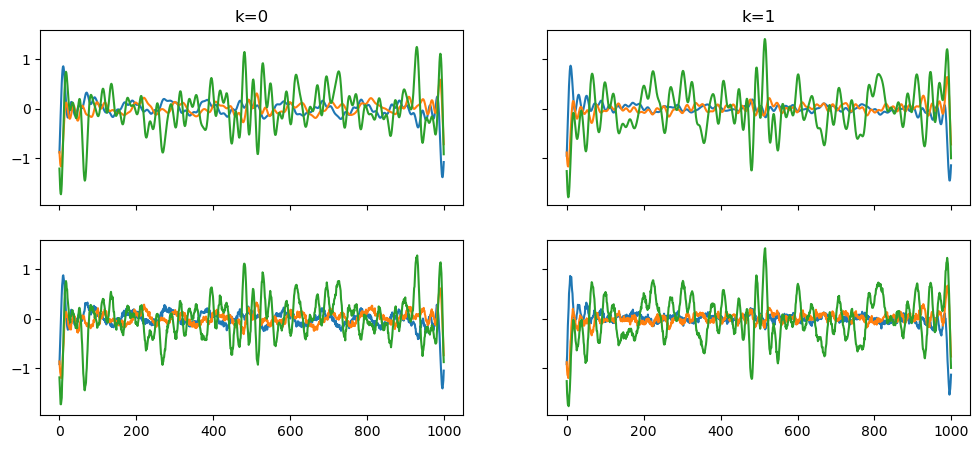

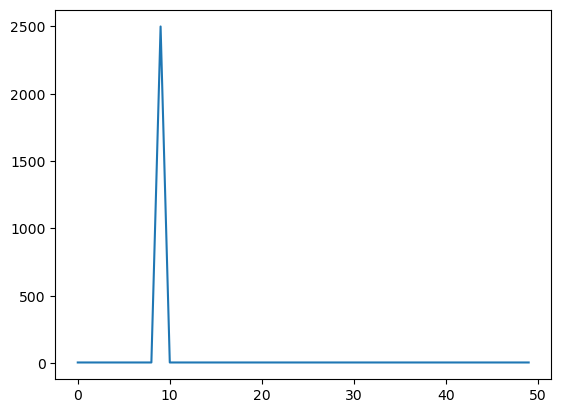

In [14]:
plt.plot(gamma_full[nz,0,0].real)